In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline
plt.rcParams['figure.figsize'] = (8,5)
sns.set(style="whitegrid")


In [5]:
file_path = r"C:\Users\koche\Downloads\internship airbnb data set.xlsx"
print("Current working dir:", os.getcwd())
xls = pd.ExcelFile(file_path)
print("Sheets:", xls.sheet_names)
df = pd.read_excel(file_path, sheet_name="in")
print("Loaded dataframe shape:", df.shape)
df.head()


Current working dir: C:\Users\koche
Sheets: ['in']
Loaded dataframe shape: (102599, 26)


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [6]:
print("Columns:", df.columns.tolist())
print("\nMissing values (top):")
display(df.isnull().sum().sort_values(ascending=False).head(15))

Columns: ['id', 'NAME', 'host id', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country', 'country code', 'instant_bookable', 'cancellation_policy', 'room type', 'Construction year', 'price', 'service fee', 'minimum nights', 'number of reviews', 'last review', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365', 'house_rules', 'license']

Missing values (top):


license                           102597
house_rules                        54843
last review                        15893
reviews per month                  15879
country                              532
availability 365                     448
minimum nights                       409
host name                            408
review rate number                   326
calculated host listings count       319
host_identity_verified               289
service fee                          273
NAME                                 270
price                                247
Construction year                    214
dtype: int64

Price stats: min 50.0 median 624.0 max 1200.0


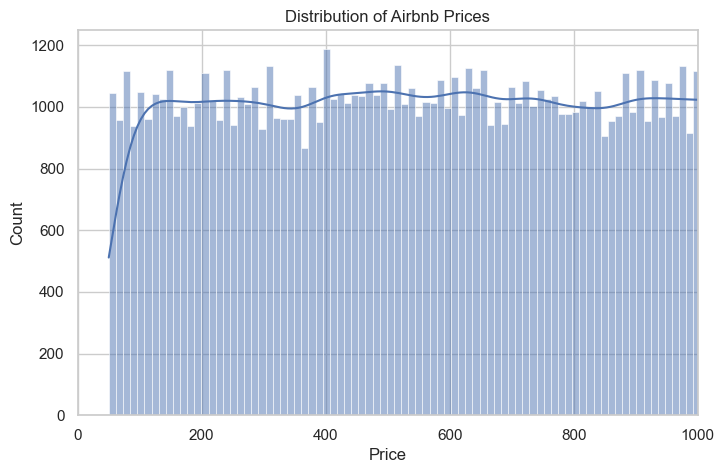

In [7]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
print("Price stats: min", df['price'].min(), "median", df['price'].median(), "max", df['price'].max())
plt.figure(figsize=(8,5))
sns.histplot(df['price'].dropna(), bins=100, kde=True)
plt.xlim(0,1000)
plt.title("Distribution of Airbnb Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

room type
Private room       625.007363
Entire home/apt    625.082232
Shared room        634.132101
Hotel room         668.465517
Name: price, dtype: float64

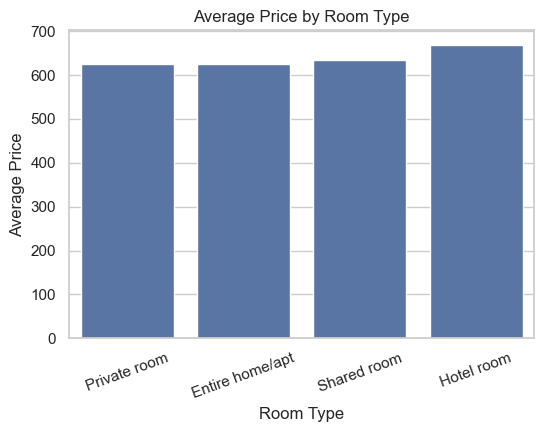

In [8]:
if 'room type' in df.columns:
    avg_by_room = df.groupby('room type')['price'].mean().sort_values()
    display(avg_by_room)
    plt.figure(figsize=(6,4))
    sns.barplot(x=avg_by_room.index, y=avg_by_room.values)
    plt.title("Average Price by Room Type")
    plt.xlabel("Room Type")
    plt.ylabel("Average Price")
    plt.xticks(rotation=20)
    plt.show()
else:
    print("No 'room type' column. Columns are:", df.columns.tolist())

neighbourhood group
Manhattan        43792
Brooklyn         41842
Queens           13267
Bronx             2712
Staten Island      955
brookln              1
manhatan             1
Name: count, dtype: int64

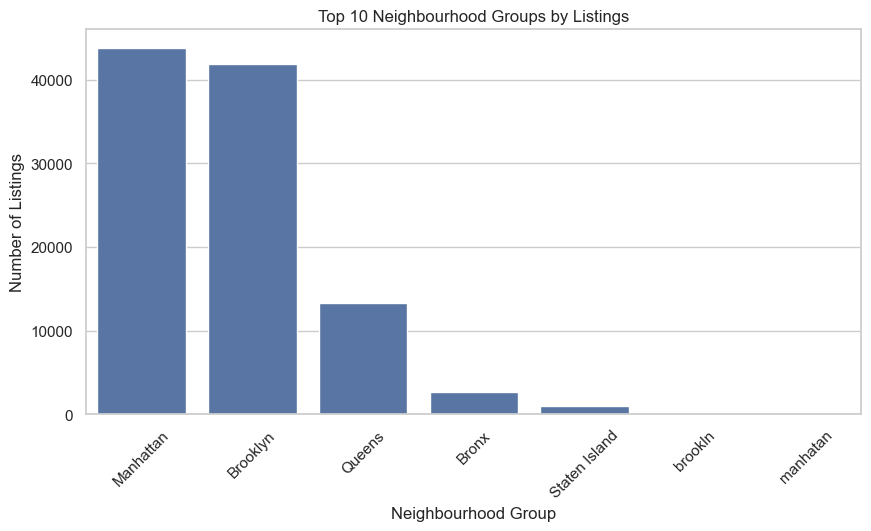

In [9]:
if 'neighbourhood group' in df.columns:
    top10 = df['neighbourhood group'].value_counts().head(10)
    display(top10)
    plt.figure(figsize=(10,5))
    sns.barplot(x=top10.index, y=top10.values)
    plt.title("Top 10 Neighbourhood Groups by Listings")
    plt.xlabel("Neighbourhood Group")
    plt.ylabel("Number of Listings")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No 'neighbourhood group' column.")

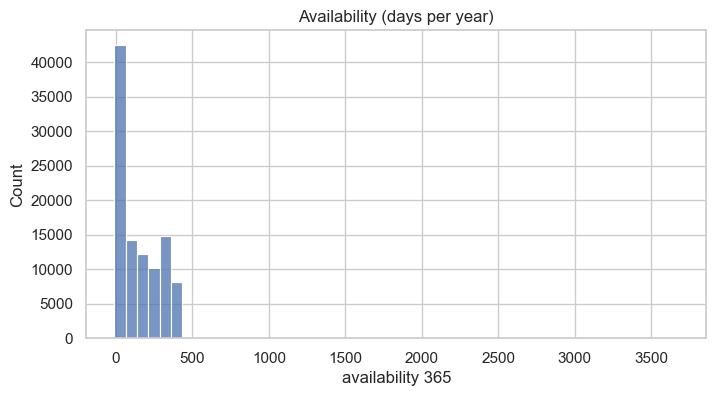

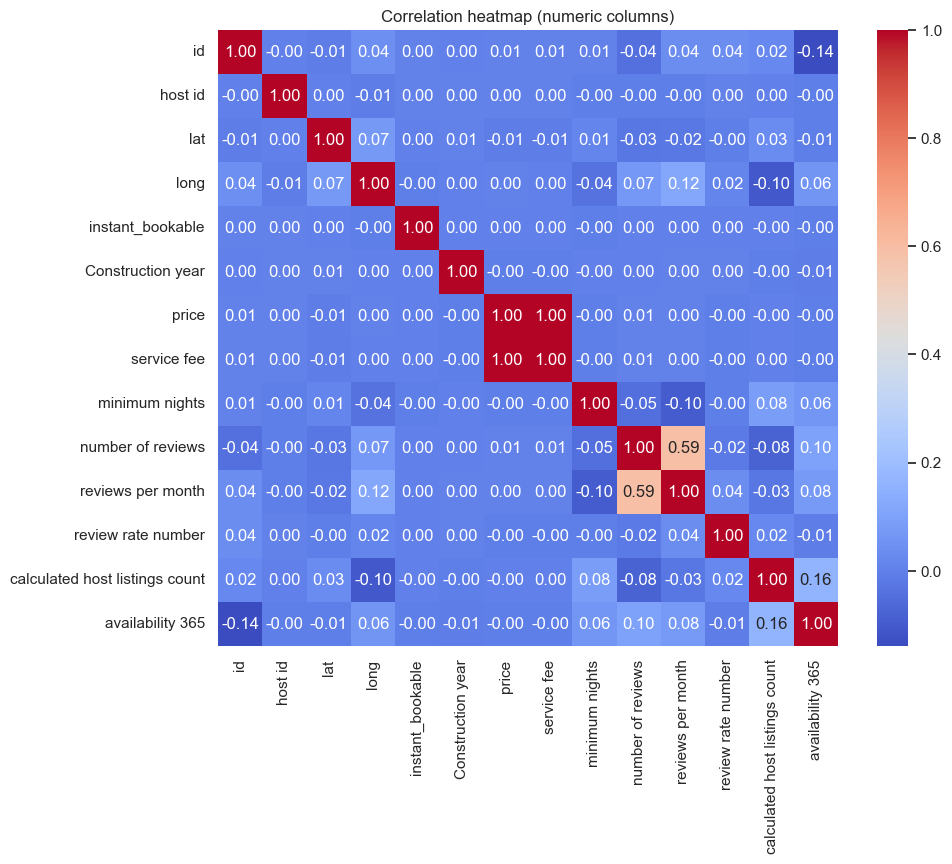

In [10]:
if 'availability 365' in df.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df['availability 365'].dropna(), bins=50)
    plt.title("Availability (days per year)")
    plt.show()

numeric = df.select_dtypes(include='number')
plt.figure(figsize=(10,8))
sns.heatmap(numeric.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation heatmap (numeric columns)")
plt.show()

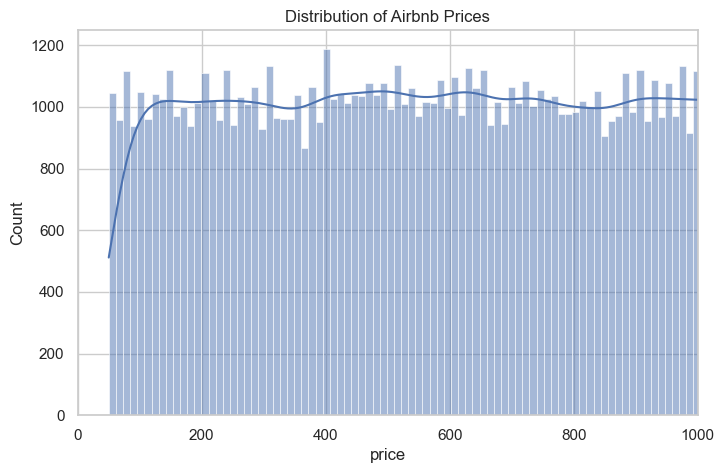

Saved: price_distribution.png (in current working dir)


In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'].dropna(), bins=100, kde=True)
plt.xlim(0,1000)
plt.title("Distribution of Airbnb Prices")
plt.savefig('price_distribution.png', bbox_inches='tight')
plt.show()
print("Saved: price_distribution.png (in current working dir)")

In [12]:
print("Quick insights:")
if 'room type' in df.columns:
    print("- Avg price by room type:")
    print(df.groupby('room type')['price'].mean().sort_values())
if 'neighbourhood group' in df.columns:
    print("- Top neighbourhood groups by listings:")
    print(df['neighbourhood group'].value_counts().head(10))

Quick insights:
- Avg price by room type:
room type
Private room       625.007363
Entire home/apt    625.082232
Shared room        634.132101
Hotel room         668.465517
Name: price, dtype: float64
- Top neighbourhood groups by listings:
neighbourhood group
Manhattan        43792
Brooklyn         41842
Queens           13267
Bronx             2712
Staten Island      955
brookln              1
manhatan             1
Name: count, dtype: int64
